In [7]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [8]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.4.2


In [14]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [15]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [59]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [60]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [61]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x000001BC0037D8A0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x000001BC0037D8A0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x000001BC0037D8A0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x000001BC0037D8A0>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x000001BC0037D8A0>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x000001BC0037D8A0>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [62]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=20, policies=5)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 20 scenarios * 5 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:18<00:00,  5.49it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [63]:
# observing the simulation runs
experiments, outcomes = results

In [64]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,128,241.308404,1.5,0.937493,34.436584,1.0,0.506706,168.859252,10.0,0.836989,...,8,0,5,3,0,2,2,121081,121076,dikesnet
1,52,324.903397,1.0,0.068462,252.354958,10.0,0.884698,207.485634,1.0,0.656061,...,8,0,5,3,0,2,2,121082,121076,dikesnet
2,17,277.066835,1.0,0.376904,175.108842,10.0,0.972241,174.764979,1.5,0.586020,...,8,0,5,3,0,2,2,121083,121076,dikesnet
3,118,216.945699,10.0,0.787221,70.515402,1.5,0.903228,337.847849,1.0,0.892243,...,8,0,5,3,0,2,2,121084,121076,dikesnet
4,32,348.019629,10.0,0.000891,163.276140,1.5,0.032283,282.985952,1.0,0.508986,...,8,0,5,3,0,2,2,121085,121076,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,179.301281,1.0,0.112610,218.470941,1.0,0.085677,256.448430,10.0,0.736932,...,9,10,2,7,9,1,4,121096,121080,dikesnet
96,86,60.396352,10.0,0.161866,308.966883,1.0,0.753113,303.681175,1.0,0.076656,...,9,10,2,7,9,1,4,121097,121080,dikesnet
97,72,269.193140,1.5,0.878689,130.875337,10.0,0.706440,80.374842,1.5,0.181204,...,9,10,2,7,9,1,4,121098,121080,dikesnet
98,123,171.232693,1.5,0.445293,328.875168,1.0,0.110696,128.718076,10.0,0.960837,...,9,10,2,7,9,1,4,121099,121080,dikesnet


In [65]:
# only works because we have scalar outcomes
df=pd.DataFrame(outcomes)

In [66]:
df['Total Deaths']=df['A.1_Expected Number of Deaths']+df['A.2_Expected Number of Deaths']+df['A.3_Expected Number of Deaths']+df['A.4_Expected Number of Deaths']+df['A.5_Expected Number of Deaths']

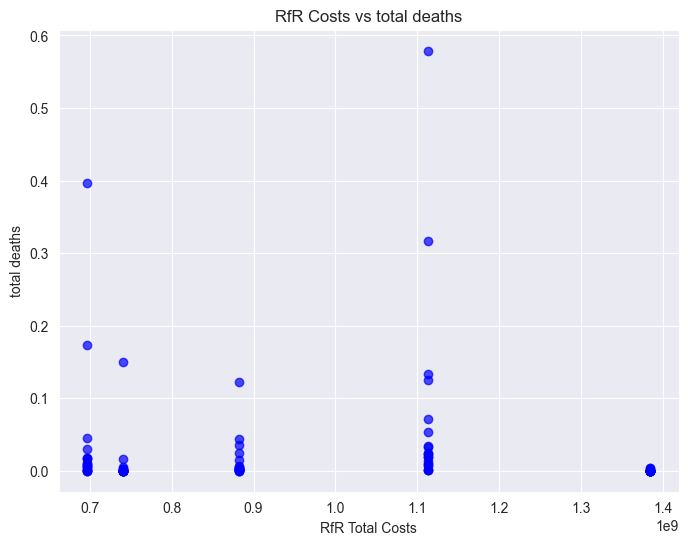

In [67]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['RfR Total Costs'], df['Total Deaths'], c='blue', alpha=0.7)
plt.xlabel('RfR Total Costs')
plt.ylabel('total deaths')
plt.title('RfR Costs vs total deaths')
plt.grid(True)
plt.show()

In [68]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,128,241.308404,1.5,0.937493,34.436584,1.0,0.506706,168.859252,10.0,0.836989,...,8,0,5,3,0,2,2,121081,121076,dikesnet
1,52,324.903397,1.0,0.068462,252.354958,10.0,0.884698,207.485634,1.0,0.656061,...,8,0,5,3,0,2,2,121082,121076,dikesnet
2,17,277.066835,1.0,0.376904,175.108842,10.0,0.972241,174.764979,1.5,0.586020,...,8,0,5,3,0,2,2,121083,121076,dikesnet
3,118,216.945699,10.0,0.787221,70.515402,1.5,0.903228,337.847849,1.0,0.892243,...,8,0,5,3,0,2,2,121084,121076,dikesnet
4,32,348.019629,10.0,0.000891,163.276140,1.5,0.032283,282.985952,1.0,0.508986,...,8,0,5,3,0,2,2,121085,121076,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,179.301281,1.0,0.112610,218.470941,1.0,0.085677,256.448430,10.0,0.736932,...,9,10,2,7,9,1,4,121096,121080,dikesnet
96,86,60.396352,10.0,0.161866,308.966883,1.0,0.753113,303.681175,1.0,0.076656,...,9,10,2,7,9,1,4,121097,121080,dikesnet
97,72,269.193140,1.5,0.878689,130.875337,10.0,0.706440,80.374842,1.5,0.181204,...,9,10,2,7,9,1,4,121098,121080,dikesnet
98,123,171.232693,1.5,0.445293,328.875168,1.0,0.110696,128.718076,10.0,0.960837,...,9,10,2,7,9,1,4,121099,121080,dikesnet


[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 100 points remaining, containing 71 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.42, coverage: 0.5915492957746479, density: 1.0 restricted_dimensions: 4


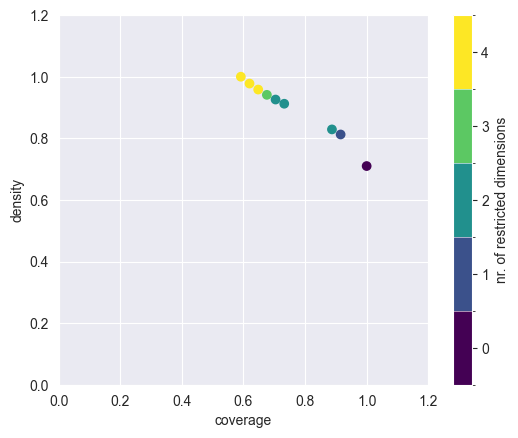

In [69]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import pairs_plotting


# x = input variables
x = experiments

# y = numeric outcome values
threshold_value = 0.01
best_cases = df['Total Deaths']<threshold_value

# initialize PRIM
prim_alg = prim.Prim(x, best_cases, threshold=threshold_value)

# search for box
box= prim_alg.find_box()

# show trade-offs between coverage and density
box.show_tradeoff()
plt.show()


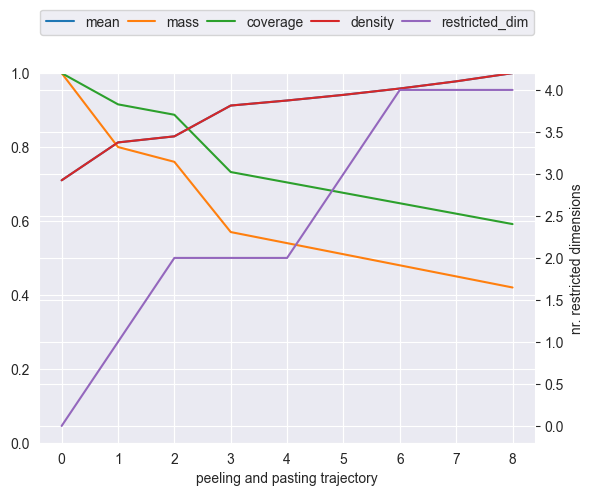

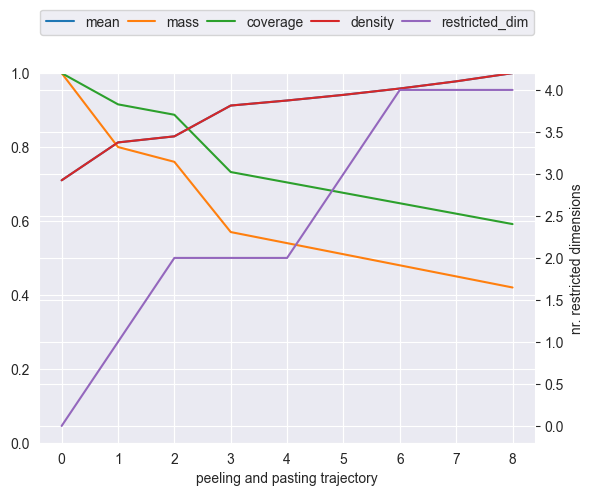

In [70]:
plt.show()
box.show_ppt()


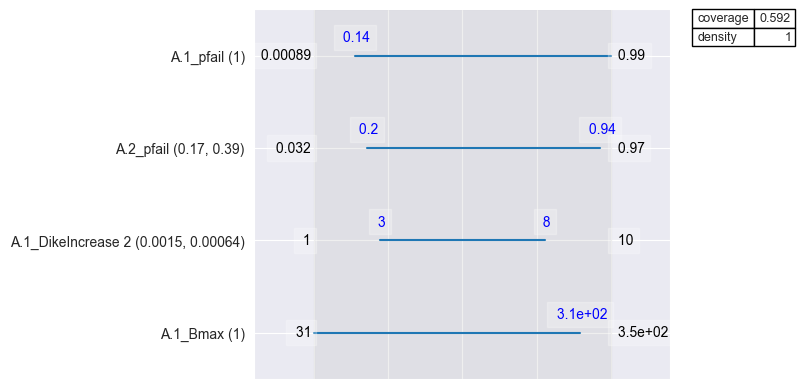

In [71]:
box.inspect(style='graph')
plt.show()

In [72]:
# Check if any NaN values exist
print(df.isna().any().any())

# Count NaN values per column
print(df.isna().sum())

False
A.1 Total Costs                  0
A.1_Expected Number of Deaths    0
A.2 Total Costs                  0
A.2_Expected Number of Deaths    0
A.3 Total Costs                  0
A.3_Expected Number of Deaths    0
A.4 Total Costs                  0
A.4_Expected Number of Deaths    0
A.5 Total Costs                  0
A.5_Expected Number of Deaths    0
RfR Total Costs                  0
Expected Evacuation Costs        0
Total Deaths                     0
dtype: int64


[MainProcess/INFO] model dropped from analysis because only a single category


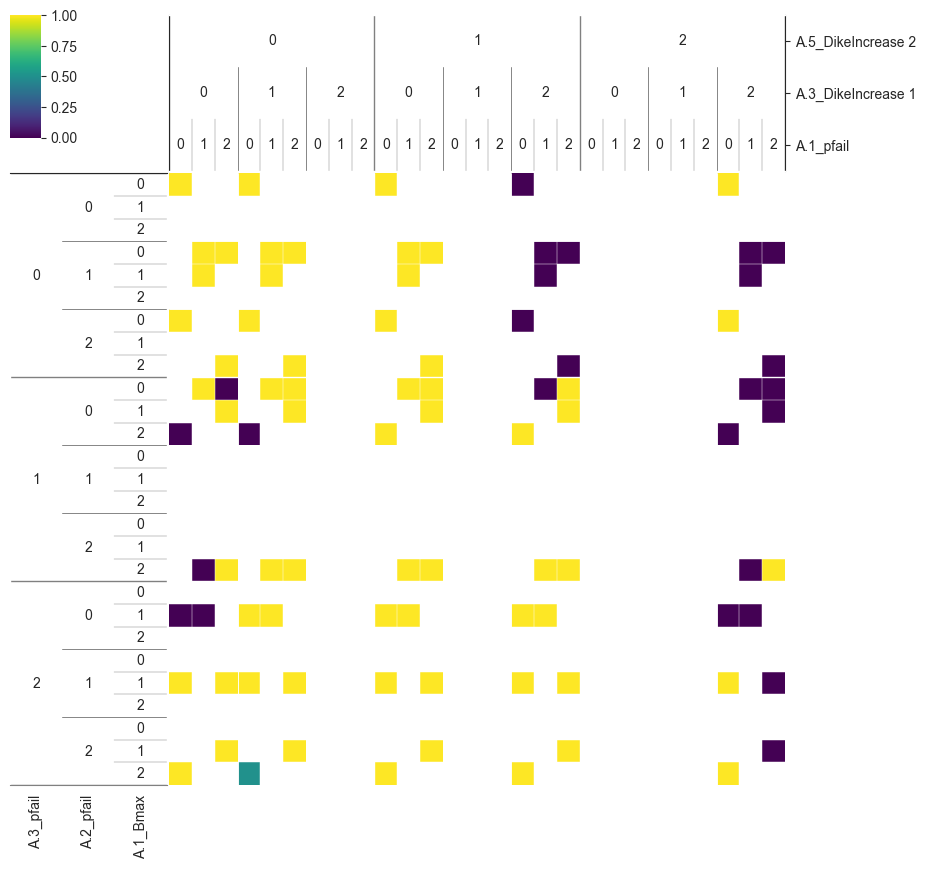

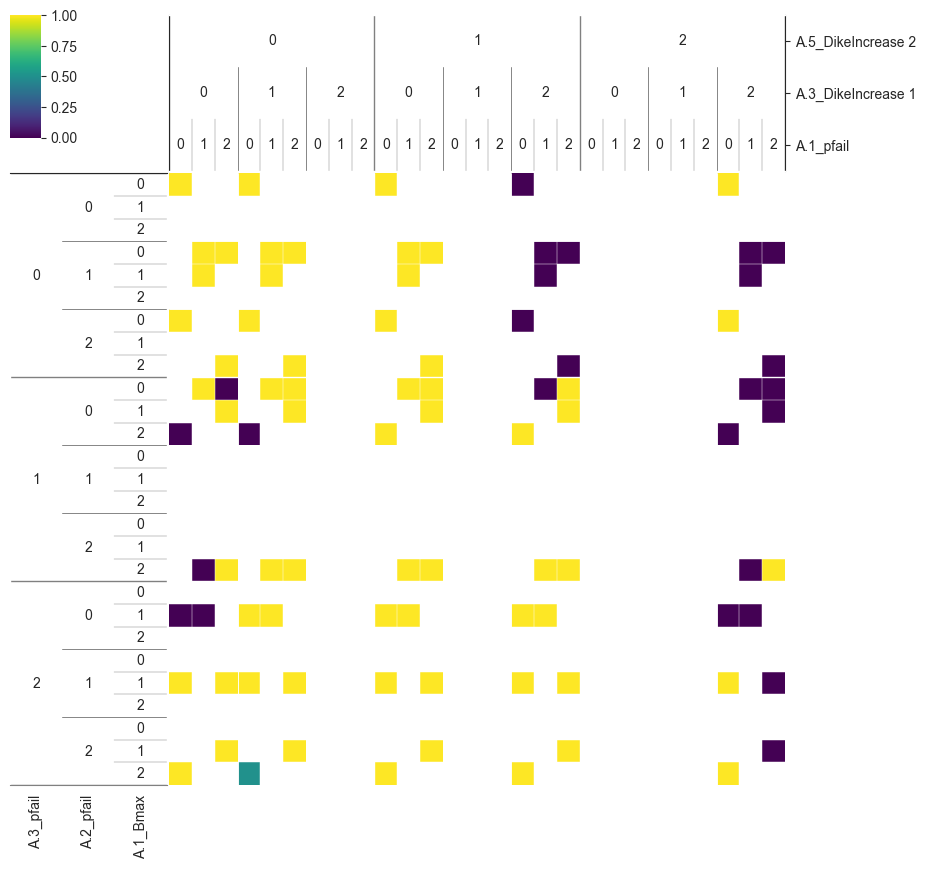

In [73]:
from ema_workbench.analysis import dimensional_stacking
best_cases_array=best_cases.to_numpy()
dimensional_stacking.create_pivot_plot(experiments, best_cases_array)



In [10]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy)

from ema_workbench import Samplers

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol

In [75]:
problem = get_SALib_problem(dike_model. uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [11]:
n_exp = 10
n_policies = 10
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_exp, uncertainty_sampling=Samplers.SOBOL, policies=n_policies)

NameError: name 'dike_model' is not defined

## Deel van Twan

In [49]:
import random
from ema_workbench import Policy

# Function to create a dictionary with all levers set to default (0)
def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}

# Function to generate policies with random lever changes
def generate_random_policies(num_policies, lever_changes_per_policy=1):
    policies = []
    lever_names = [l.name for l in dike_model.levers]  # Get all lever names

    for i in range(num_policies):
        # Start with the default policy
        policy_dict = get_do_nothing_dict()
        
        # Randomly select one lever to change
        
        for levers in range(lever_changes_per_policy):
            random_lever = random.choice(lever_names)
            #print(random_lever)
            # Assign a random value based on the lever type
            if "RfR" in random_lever:
                policy_dict[random_lever] = random.choice([0, 1])  # RfR can only be 0 or 1
            elif "DikeIncrease" in random_lever:
                policy_dict[random_lever] = random.randint(0, 10)  # DikeIncrease can be between 0 and 10
            elif "EWS_DaysToThreat" in random_lever:
                policy_dict[random_lever] = random.randint(0, 4)  # EWS_DaysToThreat can be between 0 and 4
            
            # Create the policy and add it to the list
        policies.append(Policy(f"Policy {i}", **policy_dict))
            
    
    return policies




In [50]:
n_policies = 10
n_scenarios = 10
n_changes = 10

# Generate a list of policies with random lever changes
policies = generate_random_policies(n_policies, n_changes)

#for policy in policies:
    #print(policy.name, policy)


In [28]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results_normal = evaluator.perform_experiments(scenarios=n_scenarios, policies=policies)


[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 10 scenarios * 10 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:48<00:00,  2.05it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [56]:
experiments, outcomes = results_normal
# Convert outcomes to DataFrame
df_normal = pd.DataFrame(outcomes)


In [61]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,94,250.023520,1.0,0.891547,329.331398,1.0,0.627512,81.908229,10.0,0.421516,...,0,0,0,0,0,0,0,10,Policy 0,dikesnet
1,27,279.458603,1.5,0.298548,122.810733,1.0,0.302922,159.514451,1.5,0.632061,...,0,0,0,0,0,0,0,11,Policy 0,dikesnet
2,66,292.225696,10.0,0.147436,281.405525,1.5,0.590149,263.915143,1.0,0.732106,...,0,0,0,0,0,0,0,12,Policy 0,dikesnet
3,84,115.695361,1.5,0.739272,310.927627,1.5,0.700070,205.240014,1.0,0.547553,...,0,0,0,0,0,0,0,13,Policy 0,dikesnet
4,43,64.455071,1.5,0.663021,179.288126,1.5,0.165718,123.860309,10.0,0.810964,...,0,0,0,0,0,0,0,14,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22,342.497996,1.0,0.061200,199.861085,1.0,0.406012,339.576274,10.0,0.916559,...,0,0,0,0,4,1,0,15,Policy 9,dikesnet
96,114,190.906822,1.0,0.961153,240.410524,10.0,0.949191,59.140502,1.5,0.374980,...,0,0,0,0,4,1,0,16,Policy 9,dikesnet
97,12,135.898559,10.0,0.393407,145.316796,1.5,0.834791,305.996897,10.0,0.274493,...,0,0,0,0,4,1,0,17,Policy 9,dikesnet
98,54,54.045053,10.0,0.559823,67.479237,10.0,0.094446,238.164320,1.0,0.185536,...,0,0,0,0,4,1,0,18,Policy 9,dikesnet


In [ ]:
import os
from datetime import datetime

# Where to source from (change to results_sobol later)
experiments, outcomes= results_normal


# Get the current date in YYYY-MM-DD format
current_date = datetime.now().strftime('%Y-%m-%d')

# Define the folder path
folder_name = "results"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)  # Create the folder if it doesn't exist

# Save experiments DataFrame to a CSV file in the folder
experiments.to_csv(os.path.join(folder_name, f'experiments_{current_date}.csv'), index=False)

# Save outcomes DataFrame to a CSV file in the folder
df_outcomes = pd.DataFrame(outcomes)
df_outcomes.to_csv(os.path.join(folder_name, f'outcomes_{current_date}.csv'), index=False)

print(f"Experiments and outcomes saved in the '{folder_name}' folder with date {current_date}.")

Experiments and outcomes saved in the 'results' folder with date 2025-06-02.


You can also skip the two above using the produced results

In [65]:
import pandas as pd

# Define the folder path and file names
folder_name = "results"
current_date = "2025-06-02"  # Replace with the exact date if needed

# Load the experiments DataFrame
experiments = pd.read_csv(f"{folder_name}/experiments_{current_date}.csv")

# Load the outcomes DataFrame
outcomes = pd.read_csv(f"{folder_name}/outcomes_{current_date}.csv")

print("DataFrames recreated from stored CSV files.")

DataFrames recreated from stored CSV files.


In [66]:
x = experiments
x = x.drop(['scenario', 'policy', 'model'], axis = 1 )
x_levers = x.iloc[:, -31:]
x_uncertainties = x.iloc[:, 0:-31]


In [67]:
outcomes_deaths = pd.DataFrame(outcomes).iloc[:, 1:-2:2]  # Convert to DataFrame and select odd-indexed columns
outcomes_deaths['Total_Deaths'] = outcomes_deaths.sum(axis=1)
y = outcomes_deaths['Total_Deaths']
y_mean = y.mean()
print(y_mean)
y = y<y_mean

0.5743893887064797


You can change x_levers to x_uncertainties (or the other way around) below to do a different PRIM

In [70]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x_uncertainties, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 100 points remaining, containing 68 cases of interest


[MainProcess/INFO] mean: 1.0, mass: 0.2, coverage: 0.29411764705882354, density: 1.0 restricted_dimensions: 5


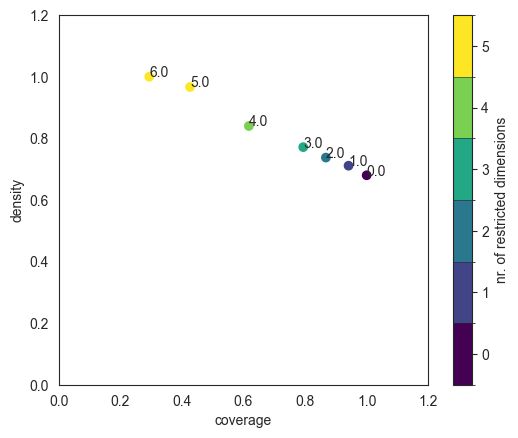

In [71]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff(annotated=True)
plt.show()

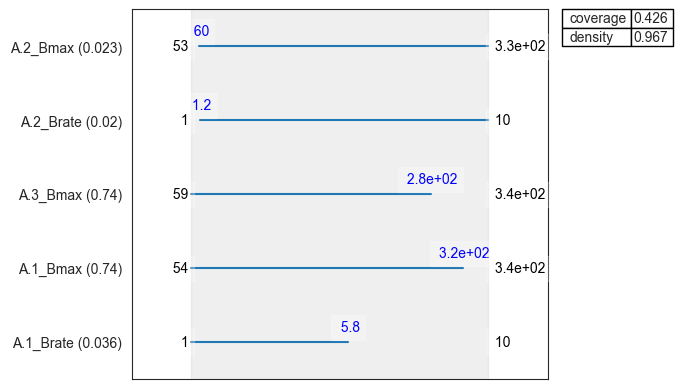

In [72]:
point = 5 # change
box1.inspect(point, style='graph')
plt.show()

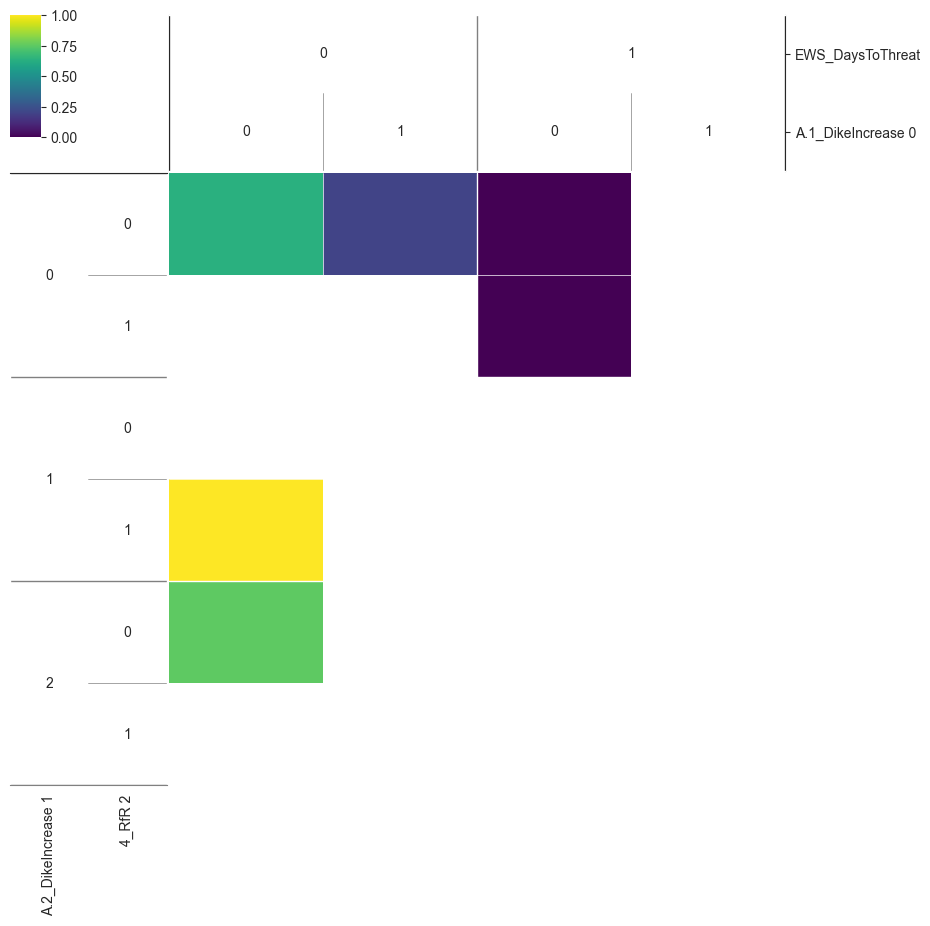

In [73]:
from ema_workbench.analysis import dimensional_stacking
from matplotlib import pyplot as plt
y = outcomes_deaths['Total_Deaths']
y_discretized = pd.cut(y, bins=5, labels=False)  # Equal-width bins
y_discretized = y_discretized.to_numpy()

dimensional_stacking.create_pivot_plot(x_levers, y_discretized, 2, nbins=5)
plt.show()

## Deel van Merel dat vgm nog niet helemaal werkt

In [ ]:

prey_final_sobol = outcomes_sobol['prey'][:,0,-1]
prey_mean_sobol = np.mean(outcomes_sobol['prey'][:,0,:],axis=1)
prey_std_sobol = np.std(outcomes_sobol['prey'][:,0,:],axis=1)

Si = sobol.analyze(problem, prey_mean_sobol, calc_second_order=True, print_to_console=True)

In [ ]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations

def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"3_RfR 0": 1, "3_RfR 1": 0, "3_RfR 2": 0, "4_RfR 0": 1, "4_RfR 1":0, "4_RfR 2":0,  "A.3_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"3_RfR 0": 1, "3_RfR 1": 0, "3_RfR 2": 0, "4_RfR 0": 1, "4_RfR 1":0, "4_RfR 2":0, "2_RfR 0": 1, "2_RfR 1":0, "2_RfR 2":0, "A.3_DikeIncrease 0": 5}
        )
    ),

    Policy(
        "policy 3",
        **dict(
        get_do_nothing_dict(),
            **{ "4_RfR 0": 1, "4_RfR 1":0, "4_RfR 2":0,  "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [ ]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

In [ ]:
experiments1, outcomes1 = results

In [ ]:
experiments1

In [ ]:
df_outcomes=pd.DataFrame(outcomes1)
df_experiments=pd.DataFrame(experiments1)

In [ ]:
df_outcomes['Total Deaths']=df_outcomes['A.1_Expected Number of Deaths']+df_outcomes['A.2_Expected Number of Deaths']+df_outcomes['A.3_Expected Number of Deaths']+df_outcomes['A.4_Expected Number of Deaths']+df_outcomes['A.5_Expected Number of Deaths']

In [ ]:
experiments

from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import pairs_plotting

# x = input variables
x = experiments1

# y = numeric outcome values
threshold_value = 0.1
best_cases = df_outcomes['Total Deaths'] < threshold_value

# initialize PRIM
prim_alg = prim.Prim(x, best_cases, threshold=threshold_value)

# search for box
box = prim_alg.find_box()

# show trade-offs between coverage and density
box.show_tradeoff()
plt.show()


In [ ]:
# Sample using Sobol sequences (use a power of 2 for efficiency)
from SALib.sample.saltelli import sample
# Generate samples
param_values = sample(problem, 512, calc_second_order=False)  # 512 is base sample size

# Run experiments
experiments, outcomes = perform_experiments(dike_model, scenarios=param_values)

# Extract the outcome of interest
Y = outcomes['Total Deaths']

# Sobol sensitivity analysis
Si = sobol.analyze(problem, Y, calc_second_order=False)


In [ ]:
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import pairs_plotting

# List of policies
policies = ['policy 1', 'policy 2', 'policy 3']

# Set threshold for filtering best cases
threshold_value = 0.1

for policy in policies:
    print(f"\nRunning PRIM for {policy}...")

    # Filter data for the current policy
    x = experiments1[experiments1['policy'] == policy]
    y = df_outcomes.loc[x.index]  # ensure outcome matches filtered experiments

    # Define best cases based on outcome threshold
    best_cases = y['Total Deaths'] < threshold_value

    # Initialize PRIM
    prim_alg = prim.Prim(x, best_cases, threshold=threshold_value)

    # Search for box
    box = prim_alg.find_box()

    # Show trade-offs between coverage and density
    box.show_tradeoff()
    plt.title(f"Trade-off for {policy}")
    plt.show()

    # Optional: inspect the box
    # box.inspect()
    # box.inspect(style='graph')


In [ ]:
from ema_workbench.analysis import prim, dimensional_stacking
import matplotlib.pyplot as plt
from ema_workbench.analysis import pairs_plotting

# List of policies
policies = ['policy 1', 'policy 2', 'policy 3']

# Set threshold for filtering best cases
threshold_value = 0.1

for policy in policies:
    print(f"\nRunning PRIM for {policy}...")

    # Filter data for the current policy
    x = experiments1[experiments1['policy'] == policy]
    y = df_outcomes.loc[x.index]  # Ensure alignment of outcomes with filtered experiments

    # Define best cases based on outcome threshold
    best_cases = y['Total Deaths'] < threshold_value

    # Run PRIM
    prim_alg = prim.Prim(x, best_cases, threshold=threshold_value)
    box = prim_alg.find_box()

    # Show trade-off plot
    box.show_tradeoff()
    plt.title(f"Trade-off for {policy}")
    plt.show()

    # Create dimensional stacking plot for best cases
    if best_cases.any():
        print(f"Creating dimensional stacking plot for {policy}...")
        dimensional_stacking.create_pivot_plot(x[best_cases], x[best_cases].to_numpy())
        plt.title(f"Dimensional Stacking - {policy}")
        plt.show()


In [ ]:
plt.show()
box.show_ppt()

In [ ]:
box.inspect(style='graph')
plt.show()

In [ ]:
from ema_workbench.analysis import dimensional_stacking
import matplotlib.pyplot as plt

# Loop through each policy and create a pivot plot
for policy_name in ['Policy 1', 'Policy 2', 'Policy 3']:
    # Filter x for the current policy
    policy_mask = x['policy'] == policy_name
    if policy_mask.sum() > 0:
        print(f"Plotting for {policy_name}")
        # Subset the best_cases DataFrame to match the filtered x
        policy_cases_array = best_cases[policy_mask].to_numpy()
        # Subset the corresponding x rows
        policy_x = x[policy_mask]
        # Create the pivot plot
        dimensional_stacking.create_pivot_plot(policy_x, policy_cases_array)
        plt.title(policy_name)
        plt.show()


In [ ]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_outcomes['RfR Total Costs'], df_outcomes['Total Deaths'], c='blue', alpha=0.7)
plt.xlabel('RfR Total Costs')
plt.ylabel('total deaths')
plt.title('RfR Costs vs total deaths')
plt.grid(True)
plt.show()